In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

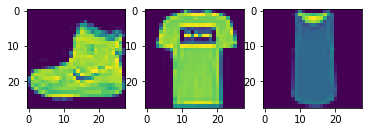

In [2]:
# 패션 MNIST는 레이블이 있는 이미지 데이터이다
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [3]:
# 딥러닝? 인공 신경망을 구축해 보자
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [4]:
# 인공 신경망을 학습시켜 보자 : 최적화와 에폭
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.8198 - accuracy: 0.6878
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6576 - accuracy: 0.7648
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5565 - accuracy: 0.8002
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5313 - accuracy: 0.8128
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5067 - accuracy: 0.8253


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.6503 - accuracy: 0.8067 - 520ms/epoch - 2ms/step

테스트 정확도: 0.8066999912261963


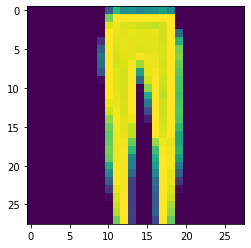

In [7]:
# 학습된 신경망을 새 이미지에 적용해 보자
import numpy as np
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [8]:
yhat = model.predict(test_images[randIdx][np.newaxis, :, :])
yhat

1/1 [==============================] - 0s 79ms/step


array([[3.2124746e-08, 1.0000000e+00, 5.6068133e-10, 2.9305420e-08,
        1.2004827e-08, 3.3696404e-14, 5.3951742e-15, 2.2986159e-35,
        2.2723991e-13, 0.0000000e+00]], dtype=float32)

In [9]:
# 클래스를 찾아 출력하게 만들기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

In [10]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis, :, :]))
print(class_names[yhat])

1/1 [==============================] - 0s 22ms/step
Trouser


In [11]:
# 인공지능? 딥어닝이라는 것은 무엇인가
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2539 - accuracy: 0.7525
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8278
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4500 - accuracy: 0.8414
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4171 - accuracy: 0.8532
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3967 - accuracy: 0.8583


In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


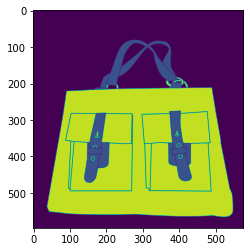

In [13]:
import cv2
path = 'C:/Users/lhk65/OneDrive/Desktop/Project/Python_Programming/Part 2/Chapter 15'
img = cv2.imread(path + '/bag_cartoon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

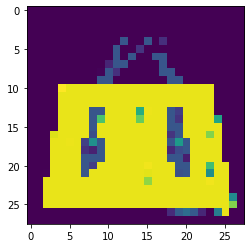

In [14]:
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [15]:
input_data = img[np.newaxis, :, :]
yhat = np.argmax(model2.predict(input_data))
print(class_names[yhat])

1/1 [==============================] - 0s 133ms/step
Bag
